<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/Anomalous_sound_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
import os

In [3]:
#Load a sample data and check the sample rate
x, sample_rate = librosa.load(r'/content/drive/MyDrive/MIMII/fan/id_00/abnormal/00000034.wav')
print('Sample rate:', sample_rate)

Sample rate: 22050


In [4]:
#Directory and Category assignment
DATADIR = '/content/drive/MyDrive/MIMII/fan/id_00'
CATEGORIES = ['normal','abnormal']

In [5]:
#Display a sample anomalous sound
from IPython.display import Audio

print('Sample anomalous fan sound:')
Audio(x,rate=sample_rate)

Sample anomalous fan sound:


In [6]:
#Display a sample normal fan sound
x1, sample_rate = librosa.load(r'/content/drive/MyDrive/MIMII/fan/id_00/normal/00000016.wav')
print('Sample normal fan sound:')
Audio(x1,rate=sample_rate)

Sample normal fan sound:


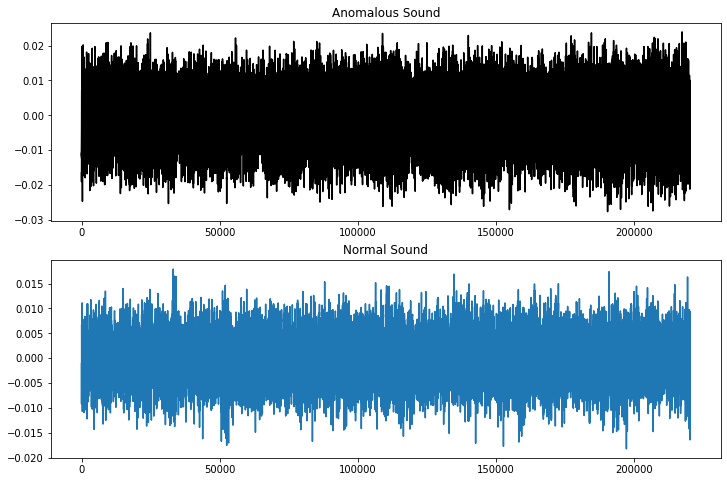

In [7]:
#Plot sample sounds
fig, axes = plt.subplots(2, figsize=(12,8))
axes[0].plot(x, 'black')
axes[0].set_title('Anomalous Sound')

axes[1].plot(x1)
axes[1].set_title('Normal Sound')
plt.show()

In [8]:
#Preprocess the data
training_data = []
def process_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
      audio_array, sr_array = librosa.load(os.path.join(path, audio))
      training_data.append([audio_array, class_num])

process_training_data()

In [9]:
#Check the length of training data
lenOfAudio = len(training_data)
print('Length of the dataset: ',lenOfAudio)

Length of the dataset:  1414


In [10]:
#Split data, label and store it in X and y array
X = []
y = []

for categories, label in training_data:
  X.append(categories)
  y.append(label)

In [11]:
#Convert X and y into numpy array and reshape X
X = np.vstack(X)
X = np.array(X).reshape(lenOfAudio, -1)
y = np.array(y)

print('X shape:', X.shape)
print('y shape: ', y.shape)

X shape: (1414, 220500)
y shape:  (1414,)


In [12]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ) # 80 : 20

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (1131, 220500)
Test data shape: (283, 220500)


In [13]:
#import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
#Decision Tree Classification
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
y_dtc = dtc.fit(X_train, y_train).predict(X_test)

In [14]:
#Decision Tree Classification result evaluation
print("Accuracy:", accuracy_score(y_test, y_dtc))
print(classification_report(y_test, y_dtc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_dtc))

Accuracy: 0.6996466431095406
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       200
           1       0.49      0.49      0.49        83

    accuracy                           0.70       283
   macro avg       0.64      0.64      0.64       283
weighted avg       0.70      0.70      0.70       283

Confusion Metrics:
[[157  43]
 [ 42  41]]


In [15]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [16]:
#Gaussian Naive Bayes evaluation
print("Accuracy:", accuracy_score(y_test, y_gnb))
print(classification_report(y_test, y_gnb))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_gnb))

Accuracy: 0.8056537102473498
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       200
           1       1.00      0.34      0.50        83

    accuracy                           0.81       283
   macro avg       0.89      0.67      0.69       283
weighted avg       0.85      0.81      0.77       283

Confusion Metrics:
[[200   0]
 [ 55  28]]


In [17]:
#Grid Search CV with KNeighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
y_knn_gscv = knn_gscv.fit(X_train, y_train).predict(X_test)

In [18]:
#Grid Search CV with KNeighbor Classifier evaluation
print("Accuracy:", accuracy_score(y_test, y_knn_gscv))
print(classification_report(y_test, y_knn_gscv))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn_gscv))

Accuracy: 0.9646643109540636
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       200
           1       0.89      1.00      0.94        83

    accuracy                           0.96       283
   macro avg       0.95      0.97      0.96       283
weighted avg       0.97      0.96      0.97       283

Confusion Metrics:
[[190  10]
 [  0  83]]


In [19]:
#Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss="hinge", max_iter=5)
y_sgdc = sgdc.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [20]:
#Stochastic Gradient Descent Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_sgdc))
print(classification_report(y_test, y_sgdc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_sgdc))

Accuracy: 0.7314487632508834
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       200
           1       0.68      0.16      0.25        83

    accuracy                           0.73       283
   macro avg       0.71      0.56      0.55       283
weighted avg       0.72      0.73      0.67       283

Confusion Metrics:
[[194   6]
 [ 70  13]]


In [21]:
#Support Vector Machine Classifier linear kernel
from sklearn import svm

svm_classifier_linear = svm.SVC(kernel='linear')
y_svm_linear = svm_classifier_linear.fit(X_train, y_train).predict(X_test)

In [22]:
#SVM linear kernel Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_linear))
print(classification_report(y_test, y_svm_linear))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_linear))

Accuracy: 0.7102473498233216
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       200
           1       0.52      0.19      0.28        83

    accuracy                           0.71       283
   macro avg       0.63      0.56      0.55       283
weighted avg       0.67      0.71      0.66       283

Confusion Metrics:
[[185  15]
 [ 67  16]]


In [23]:
#SVM Classifier poly kernel
from sklearn import svm

svm_classifier_poly = svm.SVC(kernel='poly')
y_svm_poly = svm_classifier_poly.fit(X_train, y_train).predict(X_test)

In [24]:
#SVM poly Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_poly))
print(classification_report(y_test, y_svm_poly))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_poly))

Accuracy: 0.7208480565371025
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       200
           1       1.00      0.05      0.09        83

    accuracy                           0.72       283
   macro avg       0.86      0.52      0.46       283
weighted avg       0.80      0.72      0.62       283

Confusion Metrics:
[[200   0]
 [ 79   4]]


In [14]:
#SVM Classifier rbf kernel
from sklearn import svm

svm_classifier_rbf = svm.SVC(kernel='rbf')
y_svm_rbf = svm_classifier_rbf.fit(X_train, y_train).predict(X_test)

In [15]:
#SVM rbf Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_rbf))
print(classification_report(y_test, y_svm_rbf))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_rbf))

Accuracy: 0.8833922261484098
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       212
           1       1.00      0.54      0.70        71

    accuracy                           0.88       283
   macro avg       0.93      0.77      0.81       283
weighted avg       0.90      0.88      0.87       283

Confusion Metrics:
[[212   0]
 [ 33  38]]


In [16]:
#Neural network models (supervised) Classification
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
y_mlpc = mlpc.fit(X_train, y_train).predict(X_test)

In [17]:
#Neural network models (supervised) Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_mlpc))
print(classification_report(y_test, y_mlpc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_mlpc))

Accuracy: 0.7491166077738516
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       212
           1       0.00      0.00      0.00        71

    accuracy                           0.75       283
   macro avg       0.37      0.50      0.43       283
weighted avg       0.56      0.75      0.64       283

Confusion Metrics:
[[212   0]
 [ 71   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#Comparison of models' performance
import pandas as pd

models = ['Decision Tree', 'Gaussian Naive Bayes', 'Grid Search CV',
          'Stochastic Gradient Descent','SVM Linear','SVM Poly','SVM RBF', 'MLPClassifier']

d = 0.6996466431095406
g = 0.8056537102473498
gs = 0.9646643109540636
sg = 0.7314487632508834
svm_linear = 0.7102473498233216
svm_poly = 0.7208480565371025
svm_rbf = 0.8833922261484098
m = 0.7491166077738516

tests_score = [d, g, gs, sg, svm_linear,svm_poly,svm_rbf, m]
compare_models = pd.DataFrame({ "Algorithm": models, "Accuracy": tests_score })
compare_models.sort_values(by = "Accuracy", ascending = False)

,Algorithm,Accuracy
2,Grid Search CV,0.964664
6,SVM RBF,0.883392
1,Gaussian Naive Bayes,0.805654
7,MLPClassifier,0.749117
3,Stochastic Gradient Descent,0.731449
5,SVM Poly,0.720848
4,SVM Linear,0.710247
0,Decision Tree,0.699647
